In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
from PIL import Image
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator


In [3]:
#Transfer 'jpg' images to an array IMG
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".png":
            img = read(PATH)

            img = cv2.resize(img, (RESIZE,RESIZE))
            img = cv2.GaussianBlur(img,(3,3),cv2.BORDER_DEFAULT)
            sharpen= np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
            sharpened_image=cv2.filter2D(img, -1, sharpen)
            IMG.append(np.array(sharpened_image))
    return IMG

nocancer_train = np.array(Dataset_loader('C:/Users/Kaustuv/archive (1)/BreastCancer/train/0_NoCancer',224))
cancer_train = np.array(Dataset_loader('C:/Users/Kaustuv/archive (1)/BreastCancer/train/1_Cancer',224))
nocancer_test = np.array(Dataset_loader('C:/Users/Kaustuv/archive (1)/BreastCancer/test/0_NoCancer',224))
cancer_test = np.array(Dataset_loader('C:/Users/Kaustuv/archive (1)/BreastCancer/test/1_Cancer',224))

100%|██████████| 197/197 [00:00<00:00, 1380.91it/s]


In [4]:
# Create labels
nocancer_train_label = np.zeros(len(nocancer_train))
cancer_train_label = np.ones(len(cancer_train))
nocancer_test_label = np.zeros(len(nocancer_test))
cancer_test_label = np.ones(len(cancer_test))
# Merge data 
X_train = np.concatenate((nocancer_train, cancer_train), axis = 0)
Y_train = np.concatenate((nocancer_train_label, cancer_train_label), axis = 0)
X_test = np.concatenate((nocancer_test, cancer_test), axis = 0)
Y_test = np.concatenate((nocancer_test_label, cancer_test_label), axis = 0)
# Shuffle train data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

# Shuffle test data
s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]


In [5]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_train_updated = X_train.reshape(len(X_train), -1)
np.unique(Y_train)
X_train.shape, X_train_updated.shape

((1876, 224, 224, 3), (1876, 150528))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    X_train_updated, Y_train, 
    test_size=0.3, 
    random_state=11
)

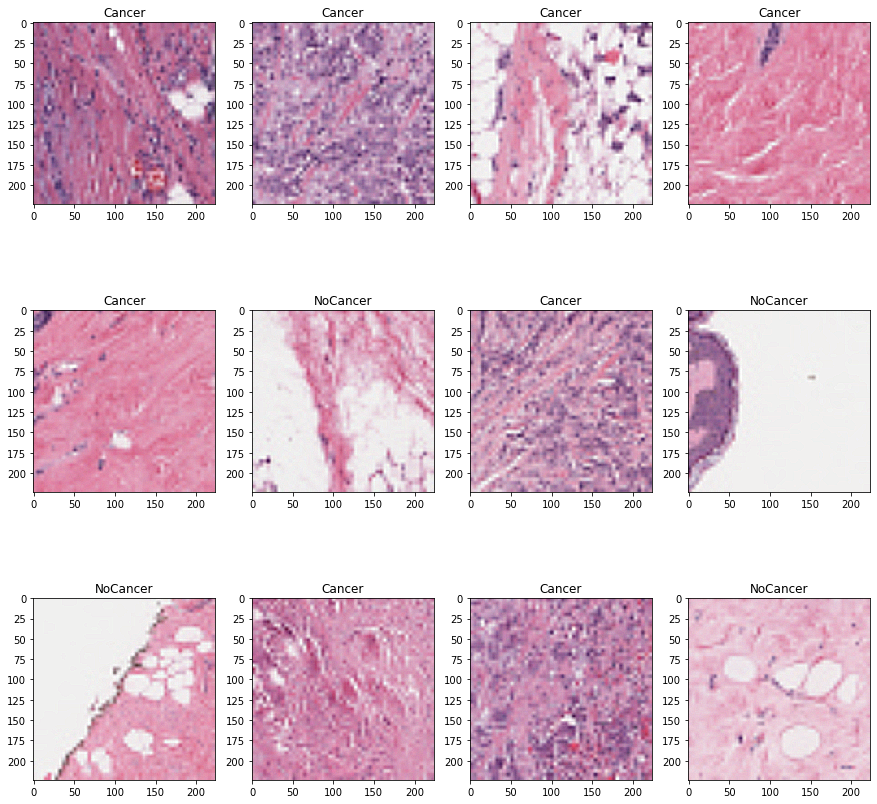

In [22]:
# # Display first 15 images of moles, and how they are classified
w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if Y_train[i] == 0:
        ax.title.set_text('NoCancer')
    else:
        ax.title.set_text('Cancer')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [7]:
x_train.shape, x_test.shape

((1313, 150528), (563, 150528))

In [8]:
print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())
x_train = x_train/255
x_test = x_test/255
print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [10]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C = 0.1)
lg.fit(x_train, y_train)

LogisticRegression(C=0.1)

In [11]:
sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [13]:
print("Training Score: ", lg.score(x_train, y_train))
print("Testing Score: ", lg.score(x_test, y_test))

Training Score:  0.9992383853769993
Testing Score:  0.8028419182948491


In [15]:
print("Training Score: ", sv.score(x_train, y_train))
print("Testing Score: ", sv.score(x_test, y_test))

Training Score:  0.9268849961919269
Testing Score:  0.8241563055062167


In [17]:
pred = sv.predict(x_test)
score = accuracy_score (pred, y_test)

In [18]:
print(score)

0.8241563055062167


In [24]:
misclassified = np.where(y_test != pred)
misclassified

(array([  5,   6,  14,  17,  19,  23,  37,  49,  50,  52,  57,  62,  66,
         71,  73,  79,  84,  87,  90,  96,  98, 100, 106, 114, 128, 129,
        137, 143, 144, 157, 170, 176, 178, 185, 186, 188, 189, 192, 195,
        207, 238, 240, 243, 244, 249, 250, 251, 277, 283, 289, 293, 306,
        308, 316, 317, 337, 342, 346, 347, 348, 354, 363, 372, 373, 376,
        379, 386, 388, 392, 403, 404, 405, 406, 411, 415, 416, 419, 432,
        448, 453, 454, 465, 466, 470, 472, 474, 486, 496, 500, 503, 506,
        512, 513, 526, 542, 548, 549, 550, 562], dtype=int64),)

In [59]:
print('Misclassified Predicted:', pred[562])
print('Actual Classification: ', y_test[562])

Misclassified Predicted: 0.0
Actual Classification:  1.0


In [60]:
print("Total Misclassified Samples: ", len(misclassified[0]))
print(pred[178],y_test[178])

Total Misclassified Samples:  99
1.0 0.0


In [38]:
dec = {0:'NoCancer', 1:'Cancer'}

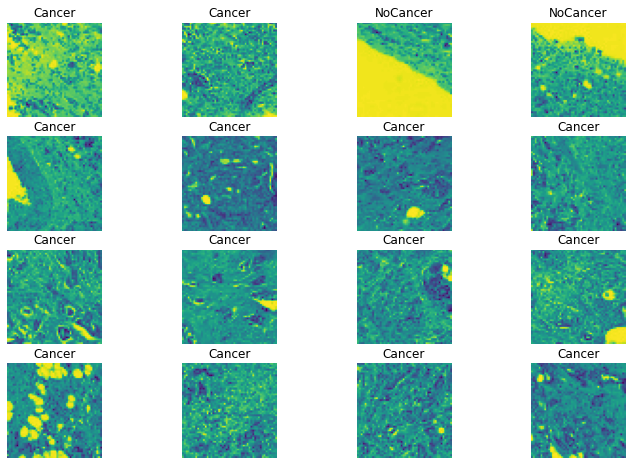

In [53]:
plt.figure(figsize = (12,8))
p = os.listdir('archive (1)/BreastCancer/test/')
c = 1
for i in os.listdir('archive (1)/BreastCancer/test/1_Cancer/')[:16]:
    plt.subplot(4,4,c)
    img = cv2.imread('archive (1)/BreastCancer/test/1_Cancer/'+i,0)
    img1 = cv2.resize(img, (384,392))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img)
    plt.axis('off')
    c += 1